In [ ]:
# Machine Learning 

In [ ]:
import pandas as pd
import zipfile
from io import BytesIO
import requests

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00577/codon_usage.csv.zip'
r = requests.get(url)
buf1 = BytesIO(r.content)
with zipfile.ZipFile(buf1, "r") as f:
    for name in f.namelist():
        if name.endswith('.csv'):
            with f.open(name) as zd:
                df = pd.read_csv(zd, encoding='latin1', sep=',')            
            break

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (5,6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df.head()

,Kingdom,DNAtype,SpeciesID,Ncodons,SpeciesName,UUU,UUC,UUA,UUG,CUU,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
0,vrl,0,100217,1995,Epizootic haematopoietic necrosis virus,0.01654,0.01203,0.00050,0.00351,0.01203,...,0.00451,0.01303,0.03559,0.01003,0.04612,0.01203,0.04361,0.00251,0.00050,0.00000
1,vrl,0,100220,1474,Bohle iridovirus,0.02714,0.01357,0.00068,0.00678,0.00407,...,0.00136,0.01696,0.03596,0.01221,0.04545,0.01560,0.04410,0.00271,0.00068,0.00000
2,vrl,0,100755,4862,Sweet potato leaf curl virus,0.01974,0.0218,0.01357,0.01543,0.00782,...,0.00596,0.01974,0.02489,0.03126,0.02036,0.02242,0.02468,0.00391,0.00000,0.00144
3,vrl,0,100880,1915,Northern cereal mosaic virus,0.01775,0.02245,0.01619,0.00992,0.01567,...,0.00366,0.01410,0.01671,0.03760,0.01932,0.03029,0.03446,0.00261,0.00157,0.00000
4,vrl,0,100887,22831,Soil-borne cereal mosaic virus,0.02816,0.01371,0.00767,0.03679,0.01380,...,0.00604,0.01494,0.01734,0.04148,0.02483,0.03359,0.03679,0.00000,0.00044,0.00131


In [ ]:
len(df)

13028

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13028 entries, 0 to 13027
Data columns (total 69 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Kingdom      13028 non-null  object 
 1   DNAtype      13028 non-null  int64  
 2   SpeciesID    13028 non-null  int64  
 3   Ncodons      13028 non-null  int64  
 4   SpeciesName  13028 non-null  object 
 5   UUU          13028 non-null  object 
 6   UUC          13028 non-null  object 
 7   UUA          13028 non-null  float64
 8   UUG          13028 non-null  float64
 9   CUU          13028 non-null  float64
 10  CUC          13028 non-null  float64
 11  CUA          13028 non-null  float64
 12  CUG          13028 non-null  float64
 13  AUU          13028 non-null  float64
 14  AUC          13028 non-null  float64
 15  AUA          13028 non-null  float64
 16  AUG          13028 non-null  float64
 17  GUU          13028 non-null  float64
 18  GUC          13028 non-null  float64
 19  GUA 

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [ ]:
df['Kingdom'].value_counts()

bct    2920
vrl    2832
pln    2523
vrt    2077
inv    1345
mam     572
phg     220
rod     215
pri     180
arc     126
plm      18
Name: Kingdom, dtype: int64

In [ ]:
df['DNAtype'].value_counts()

0     9267
1     2899
2      816
4       31
12       5
3        2
9        2
5        2
11       2
6        1
7        1
Name: DNAtype, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


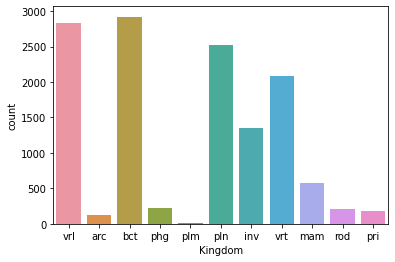

In [ ]:
sns.countplot(df['Kingdom'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


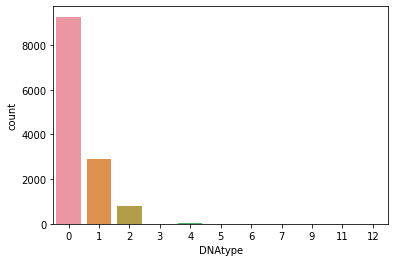

In [ ]:
sns.countplot(df['DNAtype'])

In [ ]:
df.nunique()

Kingdom           11
DNAtype           11
SpeciesID      12368
Ncodons         7103
SpeciesName    13016
               ...  
GAA             4827
GAG             4686
UAA              703
UAG              422
UGA             1786
Length: 69, dtype: int64

In [ ]:
df.isna().sum()

Kingdom        0
DNAtype        0
SpeciesID      0
Ncodons        0
SpeciesName    0
              ..
GAA            0
GAG            0
UAA            0
UAG            0
UGA            0
Length: 69, dtype: int64

In [ ]:
numeric_feature = [feature for feature in df.columns if ((df[feature].dtypes !='O') & (feature not in ['Kingdom']))]

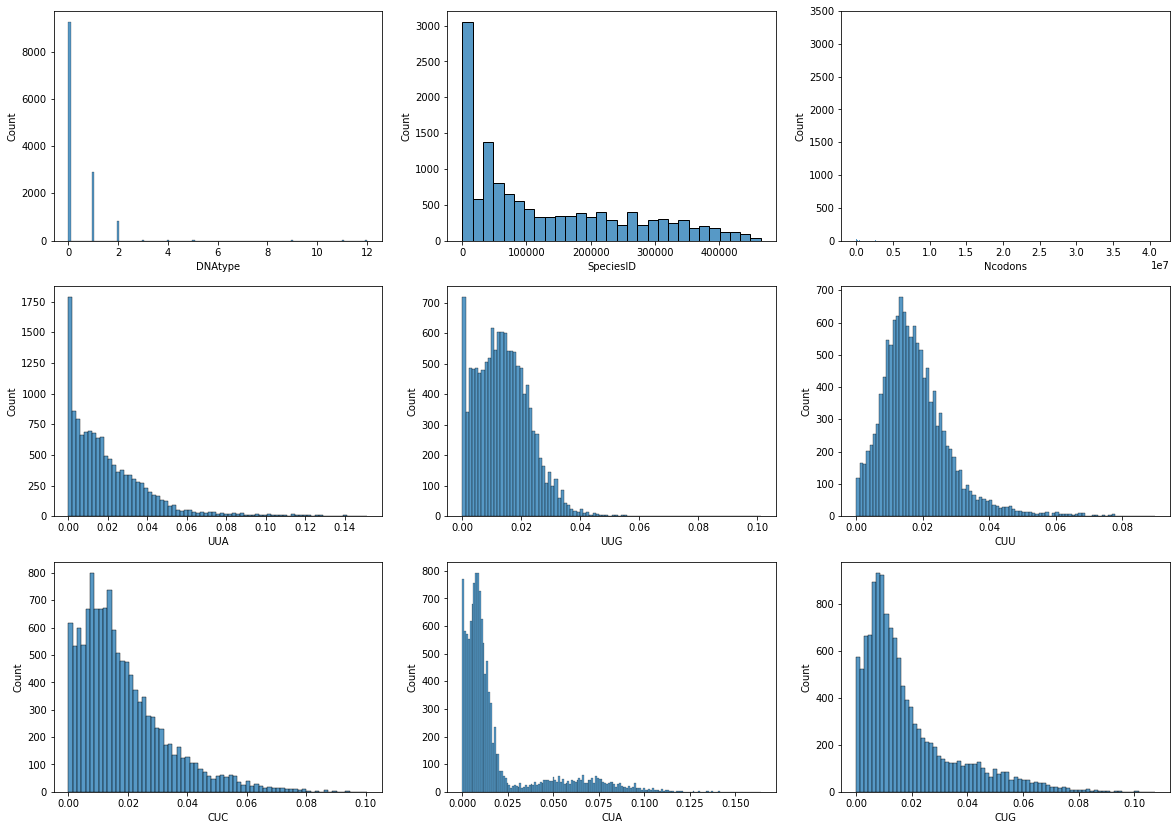

In [ ]:
plt.figure(figsize=(20,60))
plotnumber2 = 1
for numeric_f in numeric_feature:
    if plotnumber2 <= 9:
      ax = plt.subplot(12, 3, plotnumber2)
      sns.histplot(df[numeric_f])
      plt.xlabel(numeric_f)    
    plotnumber2+=1
plt.show()

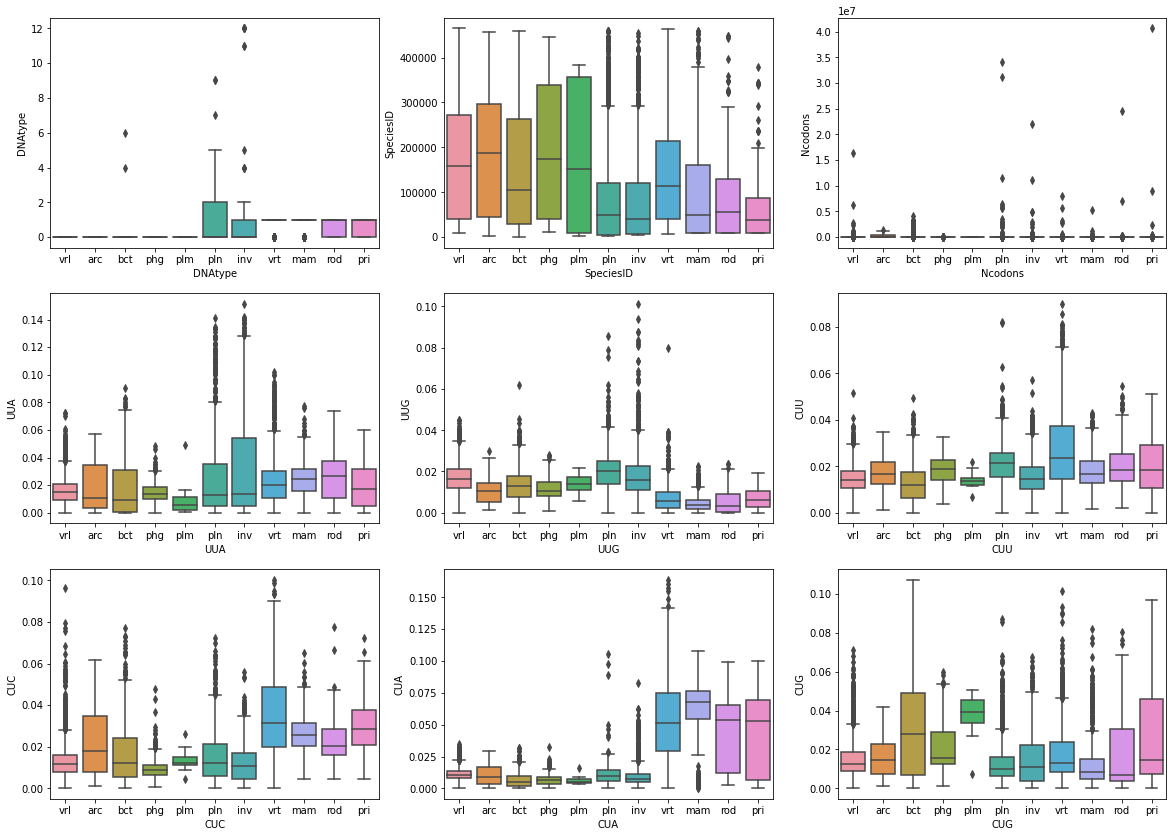

In [ ]:
plt.figure(figsize=(20,60))
plotnumber3 = 1
for numeric_f in numeric_feature:
  if plotnumber3 <= 9:
    ax = plt.subplot(12, 3, plotnumber3)
    sns.boxplot(x='Kingdom', y = df[numeric_f], data=df)
    plt.xlabel(numeric_f)    
  plotnumber3+=1
plt.show()

In [ ]:
print("Cantidad de registros duplicados:", len(df[df.duplicated(subset=None, keep = 'last')]))

Cantidad de registros duplicados: 0


In [ ]:
df.groupby('UUU')['SpeciesID'].count()['12;I']

1

In [ ]:
df.groupby('UUU').count()

,Kingdom,DNAtype,SpeciesID,Ncodons,SpeciesName,UUC,UUA,UUG,CUU,CUC,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
UUU,,,,,,,,,,,,,,,,,,,,,
0.0,12,12,12,12,12,12,12,12,12,12,...,12,12,12,12,12,12,12,12,12,12
2e-05,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
0.00063,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
0.00085,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
0.00094,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.11175,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
0.12274,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
0.12983,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [ ]:
df.groupby('UUC')['SpeciesID'].count()['-']

1

In [ ]:
import numpy as np

df['UUU'] = df['UUU'].replace(['non-B hepatitis virus','12;I'], np.nan)
df['UUC'] = df['UUC'].replace('-', np.nan)
df['UUU'] = df['UUU'].astype('float32')
df['UUC'] = df['UUC'].astype('float32')

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.head()

,Kingdom,DNAtype,SpeciesID,Ncodons,SpeciesName,UUU,UUC,UUA,UUG,CUU,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
0,vrl,0,100217,1995,Epizootic haematopoietic necrosis virus,0.01654,0.01203,0.00050,0.00351,0.01203,...,0.00451,0.01303,0.03559,0.01003,0.04612,0.01203,0.04361,0.00251,0.00050,0.00000
1,vrl,0,100220,1474,Bohle iridovirus,0.02714,0.01357,0.00068,0.00678,0.00407,...,0.00136,0.01696,0.03596,0.01221,0.04545,0.01560,0.04410,0.00271,0.00068,0.00000
2,vrl,0,100755,4862,Sweet potato leaf curl virus,0.01974,0.02180,0.01357,0.01543,0.00782,...,0.00596,0.01974,0.02489,0.03126,0.02036,0.02242,0.02468,0.00391,0.00000,0.00144
3,vrl,0,100880,1915,Northern cereal mosaic virus,0.01775,0.02245,0.01619,0.00992,0.01567,...,0.00366,0.01410,0.01671,0.03760,0.01932,0.03029,0.03446,0.00261,0.00157,0.00000
4,vrl,0,100887,22831,Soil-borne cereal mosaic virus,0.02816,0.01371,0.00767,0.03679,0.01380,...,0.00604,0.01494,0.01734,0.04148,0.02483,0.03359,0.03679,0.00000,0.00044,0.00131


In [ ]:
df_copy = df.copy()

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Kingdom'] = le.fit_transform(df['Kingdom'])

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13026 entries, 0 to 13027
Data columns (total 69 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Kingdom      13026 non-null  int64  
 1   DNAtype      13026 non-null  int64  
 2   SpeciesID    13026 non-null  int64  
 3   Ncodons      13026 non-null  int64  
 4   SpeciesName  13026 non-null  object 
 5   UUU          13026 non-null  float32
 6   UUC          13026 non-null  float32
 7   UUA          13026 non-null  float64
 8   UUG          13026 non-null  float64
 9   CUU          13026 non-null  float64
 10  CUC          13026 non-null  float64
 11  CUA          13026 non-null  float64
 12  CUG          13026 non-null  float64
 13  AUU          13026 non-null  float64
 14  AUC          13026 non-null  float64
 15  AUA          13026 non-null  float64
 16  AUG          13026 non-null  float64
 17  GUU          13026 non-null  float64
 18  GUC          13026 non-null  float64
 19  GUA 

In [ ]:
df['Kingdom'].value_counts()

1     2919
9     2831
6     2523
10    2077
2     1345
3      572
4      220
8      215
7      180
0      126
5       18
Name: Kingdom, dtype: int64

In [ ]:
X = df.drop(columns = ['Kingdom', 'SpeciesName'], axis = 1)
y = df['Kingdom']

In [ ]:
print("Dimensión X ", X.shape)
print("Dimensión y ", y.shape)

Dimensión X  (13026, 67)
Dimensión y  (13026,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
from pprint import pprint
rf_grid = {'max_depth':[3,5,10,None],
          'n_estimators':[10,100,200,300,400,500],
          'max_features':['auto', 'sqrt'],
          'criterion':['gini','entropy'],
          'bootstrap':[True,False],
          'min_samples_leaf':[1, 2, 4],
          'min_samples_split': [2, 4, 5, 10]
  }
print('Los valores a probar en la búsqueda por grilla son:')
pprint(rf_grid)

Los valores a probar en la búsqueda por grilla son:
{'bootstrap': [True, False],
 'criterion': ['gini', 'entropy'],
 'max_depth': [3, 5, 10, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 4, 5, 10],
 'n_estimators': [10, 100, 200, 300, 400, 500]}


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

model_grid_rfc = RandomForestClassifier()
rf_grid_search = RandomizedSearchCV(
    estimator=model_grid_rfc,
    param_distributions=rf_grid,
    n_jobs=-1,    
    cv=3
)
rf_grid_search.fit(X_train, y_train)

rf_gridsearch_best = rf_grid_search.best_estimator_

print('Los hiperparámetros del mejor modelo son:')
pprint(rf_grid_search.best_params_)
print()

print('Exactitud luego de búsqueda en grilla en entrenamiento:', rf_gridsearch_best.score(X_train, y_train))
print('Exactitud luego de búsqueda en grilla en validación:', rf_gridsearch_best.score(X_test, y_test))

Los hiperparámetros del mejor modelo son:
{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 300}

Exactitud luego de búsqueda en grilla en entrenamiento: 1.0
Exactitud luego de búsqueda en grilla en validación: 0.9267075978511128
